#  Lab 5-  Support Vector Machines (SVM)

**Objectives**: Implement SVM classifiers  for linearly and nonlinearly separable datasets. 

SVM with Gaussian Radial Basis Function (RBF) kernel. 

Cross validation to select the best SVM parameters. 

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#to load matlab mat files
from scipy.io import loadmat

### PART 1 - Linearly separable Data (linear SVM)

File *ex6data1.mat* consists of 2D linearly separable dataset (i.e. with linear boundary between the two classes).  

In [4]:
# load the file ex6data1.mat  and extract arrays X and y.
mat=loadmat("ex6data1.mat")

X = mat["X"]
y = mat["y"]

### Plot data

Plot the data to get Fig.1. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1; 4.1). You will see how this outlier affects the SVM decision boundary.

<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1 ** : **Dataset 1 (ex6data1.mat)** </center></caption>

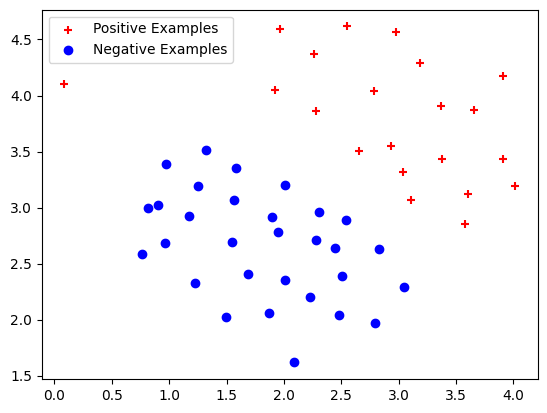

In [10]:
# Create Fig.1
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")

#add figure labels

plt.legend(["Positive Examples","Negative Examples"])


### SVM training

Scikit-learn (sklearn) is a free machine learning library for Python. It has various machine learning algorithms. It also supports Python numerical and scientific libraries like NumPy and SciPy.

*C* parameter is a positive value that controls the penalty for misclassified training examples. A large *C* tells the SVM to try to classify all examples correctly. 

*C* plays a role similar to $1/\lambda$ where $\lambda$ is the regularization parameter used for Logistic Regression. 

When C = 1, SVM will put the decision boundary in the gap between the two datasets and misclassifies the data point on the far left. 

When C = 100, SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural data fit. 


In [15]:
# From library sklearn.svm import function SVC to train SVM classifier.
# Choose linear kernel and train with different values of parameter C, for example C=1. 

#Declare the classifier 
classifier = SVC(kernel="linear",C=1)

#Fit the classifier 
classifier.fit(X,np.ravel(y))


#Print the classifier score (accuracy)  #ANSWER arround 98% accuracy
print(classifier.score(X,y))


0.9803921568627451


### Plot data + decision boundary

(1.5, 5.0)

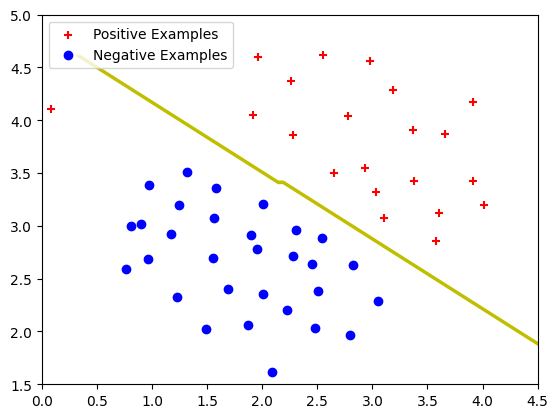

In [16]:
#PLot the data as in Fig.1 
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")

#add figure labels

plt.legend(["Positive Examples","Negative Examples"])



# add the decision boundary line
num=100
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num),np.linspace(X[:,1].min(),X[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [19]:
# Repeat SVM training for C = 100 and get accuracy 100%
# From library sklearn.svm import function SVC to train SVM classifier.
# Choose linear kernel and train with different values of parameter C, for example C=1. 

#Declare the classifier 
classifier2 = SVC(kernel="linear",C=100)

#Fit the classifier 
classifier2.fit(X,np.ravel(y))


#Print the classifier score (accuracy)  #ANSWER arround 98% accuracy
print(classifier2.score(X,y))


1.0


(1.5, 5.0)

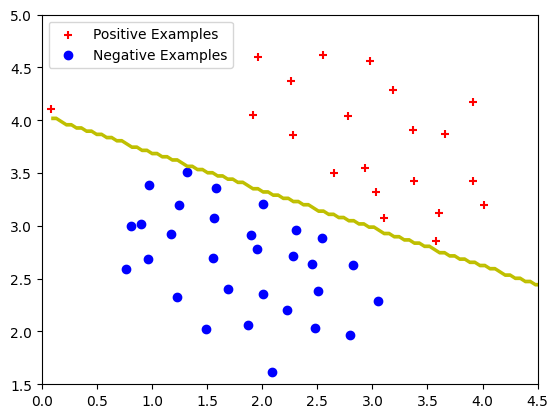

In [20]:
#Plot data + decision boundary
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")

#add figure labels

plt.legend(["Positive Examples","Negative Examples"])



# add the decision boundary line
num=100
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num),np.linspace(X[:,1].min(),X[:,1].max(),num))
plt.contour(X_1,X_2,classifier2.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

## PART 2 - Nonlinearly separable data  (SVM with Gaussian RBF Kernel)

Repeat the steps as in Part 1 bu now with nonlinearly separable data and Gaussian rbf kernel SVM.  

In [21]:
# Read ex6data2.mat and extract the saved arrays (as in Part 1)

mat=loadmat("ex6data2.mat")

X2 = mat["X"]
y2 = mat["y"]

### Plot data

Plot the data to get Fig.2. From the figure, you can observe that there is nonlinear decision boundary that separates the + and - examples for this dataset. By using SVM with Gaussian kernel, you will be able to learn a nonlinear decision boundary that fits better this data set.

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> **Fig.2 ** : **Dataset 2 (ex6data2.mat)** </center></caption>

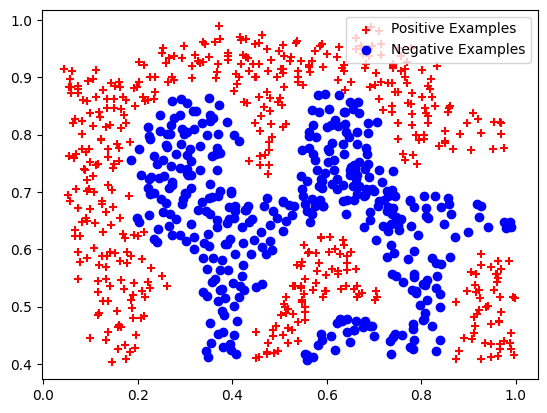

In [22]:
# Create Fig.2

# Create Fig.1
pos=(y2==1)
neg=(y2==0)
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1],c="r",marker="+")
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1],c="b",marker="o")

#add figure labels

plt.legend(["Positive Examples","Negative Examples"])

### Gaussian SVM training

Choose *rbf* (Radial Basis Function) kernel, which corresponds to Gaussian kernel. 

**gamma** parameter is the inverse of the standard deviation of the RBF kernel (gamma = $1/\sigma$). 
**gamma** is used as a similarity measure between two points. 

Small gamma value defines a Gaussian function with a large variance => two points are considered similar even if they are relatively far away from each other. 

Large gamma value defines a Gaussian function with a small variance => two points are considered similar if they are very close to each other.

In [23]:
#call SVC with rbf kernel and gamma =30 and get a score of arround 97% accuracy
# Repeat SVM training for C = 100 and get accuracy 100%
# From library sklearn.svm import function SVC to train SVM classifier.
# Choose linear kernel and train with different values of parameter C, for example C=1. 

#Declare the classifier 
classifier3 = SVC(kernel="rbf",gamma=30)

#Fit the classifier 
classifier3.fit(X2,np.ravel(y2))


#Print the classifier score (accuracy)  #ANSWER arround 98% accuracy
print(classifier3.score(X2,y2))

0.9721900347624566


### Plot data + decision boundary

Observe that the decision boundary is able to separate most of the positive and negative examples correctly. 

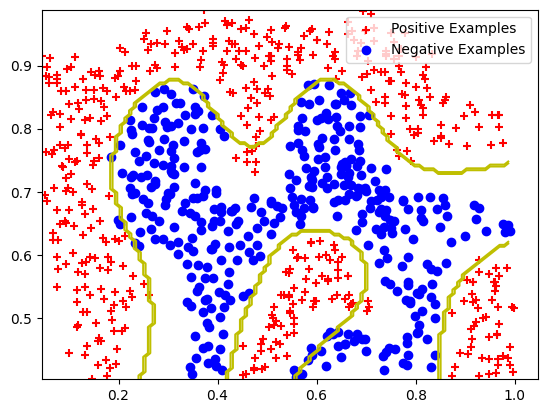

In [26]:
# as in Part 1


#Go back and check the classifiction performance of the 
#classifier with gamma=10
#Plot data + decision boundary
# Create Fig.1
pos=(y2==1)
neg=(y2==0)
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1],c="r",marker="+")
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1],c="b",marker="o")

#add figure labels

plt.legend(["Positive Examples","Negative Examples"])



# add the decision boundary line
num=100
X_1,X_2 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num),np.linspace(X2[:,1].min(),X2[:,1].max(),num))
plt.contour(X_1,X_2,classifier3.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")


### PART 3  - Nonlinear SVM with Gaussian Kernels, optimization of C and  $\sigma$ (Dataset 3)

File *ex6data3.mat* contains training data (X,y) and validation data (Xval, yval). 
Load them and plot the training data to get Fig.3. 

<img src="images/f3.png" style="width:350px;height:250px;">
<caption><center> **Fig.3 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [ ]:
# Read file ex6data3.mat and extract all saved arrays 
mat=loadmat("ex6data2.mat")

X3 = mat["X"]
y3 = mat["y"]
Xval = ?
yval = ?

In [ ]:
# Create Fig.3.
?

### Hyperparameter tuning

The task is to use the validation set Xval, yval to determine the best C and  $\sigma$ parameters.

For both C and $\sigma$, it is suggested to try the following values (0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30). 

Function *dataset3Params* tries all possible pairs of values for C and  $\sigma$. For example, for the 8 values listed above, a total of 8^2 = 64 different models will be trained and evaluated (on the validation set). For the best parameters, the SVM should return a decision boundary similar to Fig. 4.

<img src="images/f4.png" style="width:350px;height:250px;">
<caption><center> **Fig.4 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [ ]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    dataset3Params returns the optimal C and gamma(1/sigma) based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            #prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [ ]:
vals = ?

#What are the best C and sigma ?
?

#Build an SVM classifier with the best C and gamma and get classifier score of about 95% ? (training data accuracy) 
?



### Plot data + decision boundary

In [ ]:
#Create Fig.4
?